
# Supervised Learning Using Regression Analysis

### Objective:
The objective of this assignment is to deepen your understanding of regression analysis, a fundamental technique in supervised learning. This assignment will guide you through the process of building regression models, from selecting and preparing a dataset to evaluating the performance of their models. You will need to apply regression analysis concepts to a new dataset (housing data), evaluate model performance, and explore the impact of a single independent variable and multiple independent variables on the predictive capabilities of regression models. Have fun with it! :)


## Part 1: Data Preparation and Exploration


Load the House_Data.csv dataset into this notebook and show the first 10 samples to inspect the data import.code


In [4]:
# Write your codes here to import data and inspect the first 10 samples
df = pd.read_csv("Housing_Data.csv")
df.head(10)

,AvgAreaIncome,AvgAreaHouseAge,AvgAreaNumberOfRooms,AvgAreaNumberOfBedrooms,AreaPopulation,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06


In [3]:
#Write your codes here to import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Performing basic data exploration: either including histograms, or summary descriptive statistics; just using a visual exploration of the relationships between selected features.

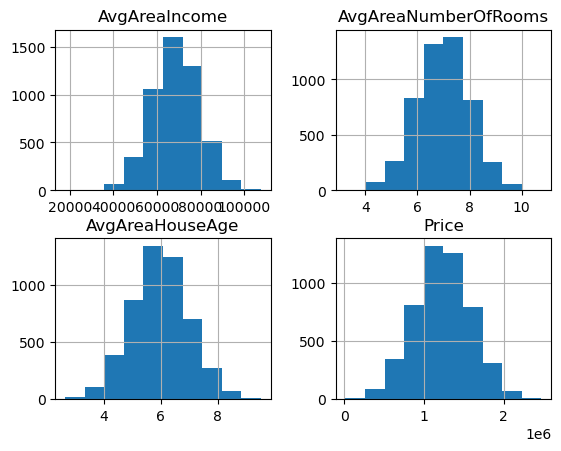

In [4]:
viz = df[['AvgAreaIncome', 'AvgAreaNumberOfRooms','AvgAreaHouseAge','Price']]
viz.hist()
plt.show()


## Part 2: Simple Linear Regression

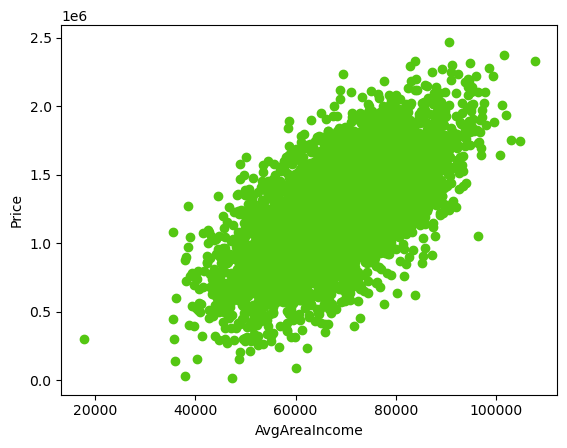

In [5]:
plt.scatter(df.AvgAreaIncome, df.Price,  color='#54C712')
plt.xlabel("AvgAreaIncome")
plt.ylabel("Price")
plt.show()


### Splitting the data into training (80%) and testing sets (20%).


In [6]:
#Write your codes here
msk = np.random.rand(len(df)) < 0.8
#print(np.random.rand(len(df)))
#print(msk)

train = df[msk]
test = df[~msk]
train.describe()
#test.describe()

train_percentage = len(train)/len(df)
print(f"Train df %: {train_percentage}")

Train df %: 0.8042


### Build a simple linear regression model using your chosen predictor variable. Train the model using the training set and perform predictions on the test set. Calculate the intercept and coefficient.

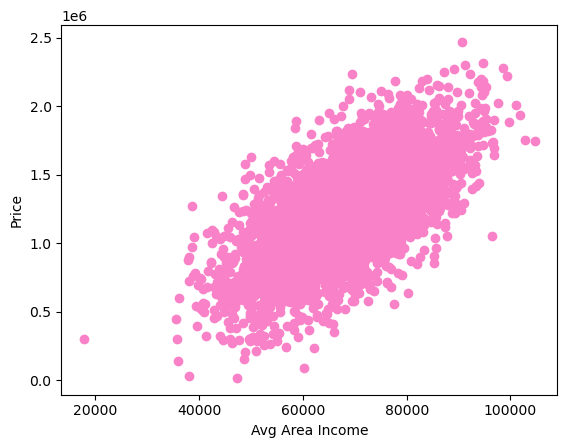

In [7]:
plt.scatter(train.AvgAreaIncome, train.Price,  color='#F981C7')
plt.xlabel("Avg Area Income")
plt.ylabel("Price")
plt.show()

#Interpret your findings here: The Scatter Plot is implying a strong correlation between average income and the price of houses.

### Visualize the regression line with the test data. 



Coefficients:  [[21.19269209]]
Intercept:  [-221419.97088623]


Text(0, 0.5, 'Price')

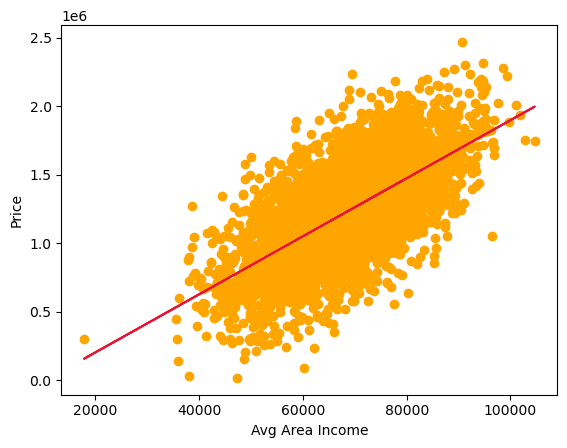

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AvgAreaIncome']])
train_y = np.asanyarray(train[['Price']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.AvgAreaIncome, train.Price,  color='orange')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '#EB1432')
plt.xlabel("Avg Area Income")
plt.ylabel("Price")


#This is the equation to keep in mind: y = 480003.25*x + 1037628.23 (equation)
#If the the avg area income increases by 10000, the price increas by 4800003.25. 

### Evaluating the model performance using metrics such as MAE, MSE, and R-squared.

Mean absolute error: 211412.79
Residual sum of squares (MSE): 71244875289.07
R2-score: 0.42


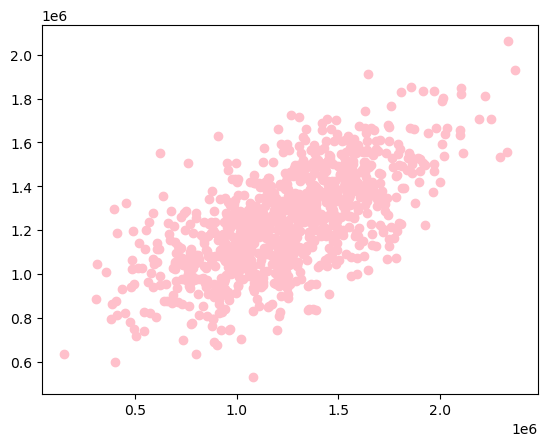

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['AvgAreaIncome']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

plt.scatter(test_y, test_y_, color = 'pink')

#There is a low correlation between the AvgAreaIncome and the Price! The Mean Absolute Error is particuly high implying
#that the forecast is inaccurate, and the r2-score implies that there is a weak correlation between the average area income
#and the price. 

### Evaluating the model performance using metrics such as MAE, MSE, and R-squared. 

   79248.6 1505890.9 1458072.1  -47818.8
   61287.1 1058988.0 1077418.0   18430.0
   59927.7  798869.5 1048608.5  249739.0
   81885.9 1545154.8 1513963.3  -31191.5
   73163.7 1291331.5 1329115.0   37783.5
   69391.4 1402818.2 1249170.2 -153648.0
   73091.9 1306674.7 1327593.5   20918.8
   62085.3 1030591.4 1094334.2   63742.7
   60697.4  743999.8 1064920.3  320920.5
   55909.3  936369.0  963449.1   27080.1
   70421.5 1744932.2 1271000.7 -473931.5
   73946.9 1109588.4 1345712.9  236124.5
   69144.7  980177.3 1243943.3  263766.0
   59539.9 1411730.5 1040391.8 -371338.7
   65925.9 1597655.3 1175726.3 -421928.9
   64419.3 1492011.5 1143797.4 -348214.1
   68791.8 1132522.9 1236463.3  103940.4
   65200.0 1177289.9 1160343.3  -16946.5
   70805.6  585608.6 1279141.5  693532.9
   95450.3 2014851.3 1801428.7 -213422.6
   66263.9 1441421.9 1182890.7 -258531.2
   70404.5 1114431.0 1270640.8  156209.9
   74218.5 1783534.8 1351469.6 -432065.2
   81543.8  954114.5 1506712.2  552597.6
   78568.4 14221

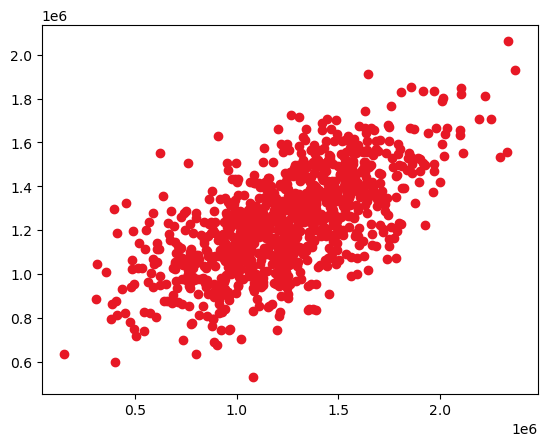

In [15]:
predictions = regr.predict(test_x)
diff_array = predictions - test_y  
combined_array = np.hstack((test_x, test_y, predictions, diff_array)) 

column_width=10
for row in combined_array:
    formatted_row = ''.join(f"{elem:{column_width}.1f}" for elem in row)
    print(formatted_row)
    
plt.scatter(test_y, test_y_,  color='#E71825')

#The prection allows me to produce the y hats in an array, which with the diff_array I am able to take the y-hat and
#subtract from the real y to see how far it is from the target y. The Combined_array function creates a table stack,
#and using the join function to concatenate elements and format them to the specified column_width. With the scatter plot,
#I can see where the prediction is related to the actual value of price.

### Use the predictions and the test_y data and find the Mean Absolute Error value and te squared value. 

In [16]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y) ** 2))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

#Interpret your findings here: With the R2 score being at 0.41, we can deaduce a low correlation between our y hat data and our actual y data.

Mean Absolute Error: 211412.79
Residual sum of squares (MSE): 71244875289.07
R2-score: 0.42



## Multiple Linear Regression

Extending the model to include multiple predictor variables.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['AvgAreaIncome', 'AvgAreaNumberOfRooms','AvgAreaHouseAge']] # Independent variables
y = df['Price']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Where was the focus?
I chose to look at the AvgAreaIncome, AvgAreaNumberOfRooms, and AvgAreaHouse as the independent variables, and the Price  as my dependent. This allows me to run a multi line regression analysis to understand the correlation between one dependent 
varibale to multiple independent variables.

### Train a multiple linear regression model using the selected predictor variables. Print out the intercept and coefficients. Interpret these values.



In [18]:
#Write you codes here

regr = LinearRegression()
regr.fit(X_train, y_train)

predictions = regr.predict(X_test)

intercept = regr.intercept_

coefficients = regr.coef_

print(f'Price = {intercept:.2f} + ({coefficients[0]:.2f} * AvgAreaIncome) + ({coefficients[1]:.2f} * AvgAreaNumberOfRooms) + ({coefficients[2]:.2f} * AvgAreaHouseAge)')

#Interpret your findings here: Price will increase by 21.35 avg area income, 119909.48 avg number of rooms, and 162314.77 avg area house age.

Price = -2041424.29 + (21.35 * AvgAreaIncome) + (119909.48 * AvgAreaNumberOfRooms) + (162314.77 * AvgAreaHouseAge)



### Evaluate and compare the performance of your multiple linear regression model to the simple linear regression model.


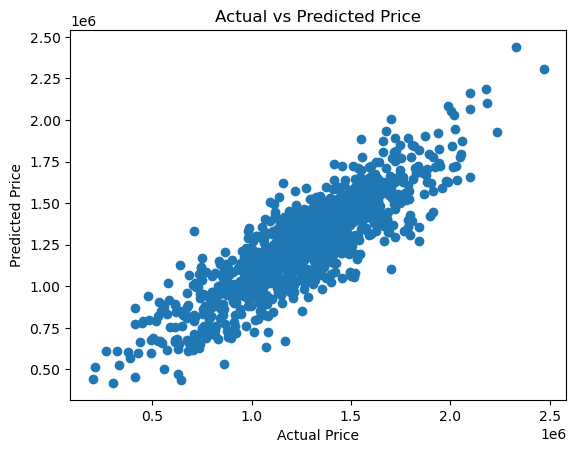

Mean Squared Error: 31169684086.54
R-squared: 0.75


In [19]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


#Interpret your findings here: Actual vs Predicted shows that the r-square is forecasting an accurate model, with strong positive correlation.

<i>My Reflection</i>

Linear regression models have only one independent variable to impact the dependent ; multiple regression models allow for multiple inependent variables to impact our dependent variable which remains singular.

With the singular regression model, I saw the model create a linear positive relationship between the price and avarage income, and yet the Mean Squared Error suggested the model to have little variance and high bias. Multiple regression model showcases a relatively low variance with the avarage area income explained by the price vairable.


The potential issue of the single linear regression models, is the limitation with single/linear relationship being an assumedly straightline. Multiple regressions is the difficulty of interpreting and communcating the results.

You can adress the linear model limitation by not following the assumption of the straight line relationship between two variables. Similarly you can deal with the interpretation of the multi-regression model by making direct connection from the dependent variable to the independent variables.